# Hyperfine Rotation Calculatino

Its time to begin!

## The etoa matrix coefficient

I've already derived this, but done fairly little to test it or implement it I think.

In [2]:
import numpy as np
from sympy.physics.wigner import wigner_9j
from sympy.physics.quantum.cg import CG

In [3]:
import MoleculeCalculation as mol

For fine structure rotation we had
$$
\langle j \Omega j_a j_b | L \Lambda L_a L_b; S \Sigma S_a S_b \rangle = \sqrt{\breve{S}\breve{j_a}\breve{j_b}\breve{L}} C^{j\Omega}_{LS\Lambda\Sigma} \begin{Bmatrix}
L_a & S_a & j_a\\
L_b & S_b & j_b\\
L & S & j
\end{Bmatrix}
$$

With hyperfine, we have:

$$
\langle j \Omega j_a j_b | L \Lambda L_a L_b; S \Sigma S_a S_b \rangle = \sqrt{\breve{S}\breve{j_a}\breve{j_b}\breve{L}} C^{j\Omega}_{LS\Lambda\Sigma} \begin{Bmatrix}
L_a & S_a & j_a\\
L_b & S_b & j_b\\
L & S & j
\end{Bmatrix}
$$

$$
\langle f \phi f_a f_b |L_a \Lambda_a L_b \Lambda_b S \Sigma I \iota\rangle = \sum_{L, j, j_a j_b} 
\bigg(
C^{L\Lambda}_{l_a \Lambda_a, l_b \Lambda_b} 
C_{L\Lambda S\Sigma}^{j\Omega} 
C_{j\Omega I \iota}^{f \phi}
\bigg)
\sqrt{\breve{j}_a\breve{j}_b\breve{f}_a\breve{f}_b
\breve{L}\breve{S}\breve{J}\breve{I}}
\begin{Bmatrix}
l_a & s_a & j_a\\
l_b & s_b & j_b\\
L & S & j
\end{Bmatrix}
\begin{Bmatrix}
j_a & i_a & f_a\\
j_b & i_b & f_b\\
j & I & f
\end{Bmatrix}
$$

So I can test my coefficient function by summing over all of the lhs states:

In [4]:
from IPython.display import display, Latex

In [5]:
import Miscellaneous as misc

So I'm having trouble with the coefficient $\langle 4,4,2,2|0,1,1,3,3\rangle$ which my algorithm is claiming is the unphysical value -1.15. Clearly wrong, it's magnitude is larger than 1. So I'm going to manually decompose it to see what the true value should be and hopefully figure out the root of the problem. The strategy will be to convert both sides to $|l \lambda s \sigma i \iota\rangle_{a,b}$ states.

This coefficient is of the form $\langle f \phi f_a f_b| l_a \lambda_a l_b \lambda_b S \Sigma I \iota\rangle$ 

So first I will decompose it to $\langle f_a \phi_a f_b \phi_b|l \lambda s \sigma i \iota\rangle_{a,b}$. Thankfully the first step here is trivial for the chosen state

$\langle 4,4,2,2|0,1,1,3,3\rangle=\langle 2,2| \langle 2,2| 
|0,0,\frac{1}{2},\frac{1}{2},\frac{3}{2},\frac{3}{2}\rangle|1,0,\frac{1}{2},\frac{1}{2},\frac{3}{2},\frac{3}{2}\rangle$

Then I do the standard decomposition $\langle f_a \phi_a|\rightarrow\langle j_a,\omega_a,i_a,\iota_a|$

$$
\bigg(\big\langle\frac{1}{2}\frac{1}{2} \frac{3}{2} \frac{3}{2} \big|\bigg)
\bigg(C_{\frac{3}{2}\frac{3}{2}\frac{ 3}{2 }\frac{1}{2}}^{2,2} \langle \frac{3}{2} \frac{3}{2} \frac{3}{2} \frac{1}{2}|
+C_{\frac{3}{2}\frac{1}{2}\frac{ 3}{2 }\frac{3}{2}}^{2,2}\langle\frac{3}{2} \frac{1}{2} \frac{3}{2}\frac{3}{2} |\bigg)
$$

In [6]:
CG(3/2,3/2,3/2,1/2,2,2).doit()**2+CG(3/2,1/2,3/2,3/2,2,2).doit()**2

1

And finally taking $\langle j_a \omega_a i_a \iota_a|\rightarrow \langle l_a \lambda_a s_a \sigma_a i_a \iota_a|$

$$
\bigg(\big\langle 00;\frac{1}{2}\frac{1}{2};\frac{3}{2} \frac{3}{2} \big|\bigg)
\bigg(C_{\frac{3}{2}\frac{3}{2}\frac{3}{2}\frac{1}{2}}^{2,2} \langle 11;\frac{1}{2}\frac{1}{2};\frac{3}{2} \frac{1}{2}|
+C_{\frac{3}{2}\frac{1}{2}\frac{ 3}{2 }\frac{3}{2}}^{2,2}
(|\rangle+|\rangle)\bigg)
$$

$$
\bigg(\big\langle 00;\frac{1}{2}\frac{1}{2};\frac{3}{2} \frac{3}{2} \big|\bigg)
\bigg(C_{\frac{3}{2}\frac{3}{2}\frac{3}{2}\frac{1}{2}}^{2,2} \langle 11;\frac{1}{2}\frac{1}{2};\frac{3}{2} \frac{1}{2}|
+C_{\frac{3}{2}\frac{1}{2}\frac{ 3}{2 }\frac{3}{2}}^{2,2}
(C_{11\frac{1}{2},-\frac{1}{2}}^{\frac{3}{2}\frac{1}{2}}
\langle1,1;\frac{1}{2},-\frac{1}{2};\frac{3}{2}\frac{3}{2}|
+C_{10\frac{1}{2}\frac{1}{2}}^{\frac{3}{2}\frac{1}{2}}
\langle1,0;\frac{1}{2},\frac{1}{2};\frac{3}{2}\frac{3}{2}|)\bigg)
$$

In [7]:
CG(1,1,1/2,-1/2,3/2,1/2).doit()**2+CG(1,0,1/2,1/2,3/2,1/2).doit()**2

1.00000000000000

And so the result is

$$
\big\langle 00;\frac{1}{2}\frac{1}{2};\frac{3}{2} \frac{3}{2} \big|\\
\bigg(C_{\frac{3}{2}\frac{3}{2}\frac{3}{2}\frac{1}{2}}^{2,2} \langle 11;\frac{1}{2}\frac{1}{2};\frac{3}{2} \frac{1}{2}|
+C_{\frac{3}{2}\frac{1}{2}\frac{ 3}{2 }\frac{3}{2}}^{2,2}
(C_{11\frac{1}{2},-\frac{1}{2}}^{\frac{3}{2}\frac{1}{2}}
\langle1,1;\frac{1}{2},-\frac{1}{2};\frac{3}{2}\frac{3}{2}|
+C_{10\frac{1}{2}\frac{1}{2}}^{\frac{3}{2}\frac{1}{2}}
\langle1,0;\frac{1}{2},\frac{1}{2};\frac{3}{2}\frac{3}{2}|)\bigg)
|0,0,\frac{1}{2},\frac{1}{2},\frac{3}{2},\frac{3}{2}\rangle|1,0,\frac{1}{2},\frac{1}{2},\frac{3}{2},\frac{3}{2}\rangle
$$

can quickly eliminate the unexcited atom:

$$
\bigg(C_{\frac{3}{2}\frac{3}{2}\frac{3}{2}\frac{1}{2}}^{2,2} \langle 11;\frac{1}{2}\frac{1}{2};\frac{3}{2} \frac{1}{2}|
+C_{\frac{3}{2}\frac{1}{2}\frac{ 3}{2 }\frac{3}{2}}^{2,2}
(C_{11\frac{1}{2},-\frac{1}{2}}^{\frac{3}{2}\frac{1}{2}}
\langle1,1;\frac{1}{2},-\frac{1}{2};\frac{3}{2}\frac{3}{2}|
+C_{10\frac{1}{2}\frac{1}{2}}^{\frac{3}{2}\frac{1}{2}}
\langle1,0;\frac{1}{2},\frac{1}{2};\frac{3}{2}\frac{3}{2}|)\bigg)
|1,0,\frac{1}{2},\frac{1}{2},\frac{3}{2},\frac{3}{2}\rangle
$$

so the result is just one of these pairs:

$$
C_{\frac{3}{2}\frac{1}{2}\frac{ 3}{2 }\frac{3}{2}}^{2,2}C_{10\frac{1}{2}\frac{1}{2}}^{\frac{3}{2}\frac{1}{2}}
$$

In [8]:
float(CG(3/2,1/2,3/2,3/2,2,2).doit()*CG(1,0,1/2,1/2,3/2,1/2).doit())

-0.5773502691896257

Okay. now I know what the answer should be, but why is my algorithm not giving me this lol

In [179]:
def subcoef_HFS_2(f_a, f_b, f_, phi_, j_a, j_b,
                S_,Sigma_,
                I_,iota_,
                Lambda_,
                Omega_,
                checks=False,
                verbose=False):
    def br(x):
        return 2*x+1
    val = 0
    L_=1
    l_a=0
    l_b=1    
    lambda_a=0
    lambda_b=Lambda_
    s_a=s_b=1/2
    i_a = i_b = 3/2
    if checks:
        if phi_ != iota_+Omega_:
            raise ValueError('Bad phi,iota,omega:',phi_,iota_,Omega_)
        if Omega_ != Sigma_+Lambda_:
            raise ValueError('Bad Omega,Sigma,Lambda:',Omega_,Sigma_,Lambda_)
        if I_ not in np.arange(abs(i_a-i_b), i_a+i_b+1,1):
            raise ValueError('Bad values: I,i_a,i_b='+str(I_)+','+str(i_a)+','+str(i_b))
        if f_ not in np.arange(abs(f_a-f_b), f_a+f_b+1,1):
            raise ValueError('Bad values: f,f_a,f_b='+str(f_)+','+str(f_a)+','+str(f_b))
        if abs(Sigma_)>S_:
            raise ValueError('Bad values: S,Sigma='+str(S_)+','+str(Sigma_))
        #assert(abs(Lambda_)<=L_)
    for j_ in np.arange( abs(j_a-j_b), j_a+j_b+1, 1):
        c2 = float(CG(1,Lambda_,S_,Sigma_,j_,Omega_).doit())
        c3 = float(CG(I_,iota_,j_,Omega_,f_,phi_).doit())
        coefs = c2*c3
        rec1 = recoupling(j_,j_a,j_b,L_,S_,l_a,s_a,l_b,s_b)
        rec2 = recoupling(f_,f_a,f_b,j_,I_,j_a,i_a,j_b,i_b)
        term = coefs * rec1*rec2
        if verbose:
            print(term)
        val += term
    return val

In [183]:
def recoupling(j,j_12,j_34,j_13,j_24,j_1,j_2,j_3,j_4):
    # caluculates <j,m_j,j_12,j_34|j,m_j,j_13,j_24>.
    def br(x):
        return 2*x+1
    brs = np.sqrt(br(j_12)*br(j_34)*br(j_13)*br(j_24))
    wigTerm = float(wigner_9j_with_table(j_1,j_2,j_12,j_3,j_4,j_34,j_13,j_24,j))
    return brs*wigTerm

In [228]:
def subcoef_HFS_3(f_a, f_b, f_, phi_, j_a, j_b,
                S_,Sigma_,
                I_,iota_,
                Lambda_,
                Omega_,
                checks=False,
                verbose=False):
    # with table acceleration for both cg and wigner 9j calculations, and using "recoupling" function to organize parts of calc.
    def br(x):
        return 2*x+1
    val = 0
    L_=1
    l_a=0
    l_b=1    
    lambda_a=0
    lambda_b=Lambda_
    s_a=s_b=1/2
    i_a = i_b = 3/2
    for j_ in np.arange( abs(j_a-j_b), j_a+j_b+1, 1):
        c2 = CG_with_table(1,Lambda_,S_,Sigma_,j_,Omega_)
        c3 = CG_with_table(I_,iota_,j_,Omega_,f_,phi_)
        coefs = c2*c3
        rec1 = recoupling(j_,j_a,j_b,L_,S_,l_a,s_a,l_b,s_b)
        rec2 = recoupling(f_,f_a,f_b,j_,I_,j_a,i_a,j_b,i_b)
        term = coefs * rec1*rec2
        if verbose:
            print(term)
        val += term
    return val

In [229]:
%%timeit
val = subcoef_HFS_3( f_a,f_b,f_,phi,j_a, j_b,
                     S_, Sigma, I_, iota, Lambda, Omega,
                     False, False )

63.2 µs ± 6.44 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


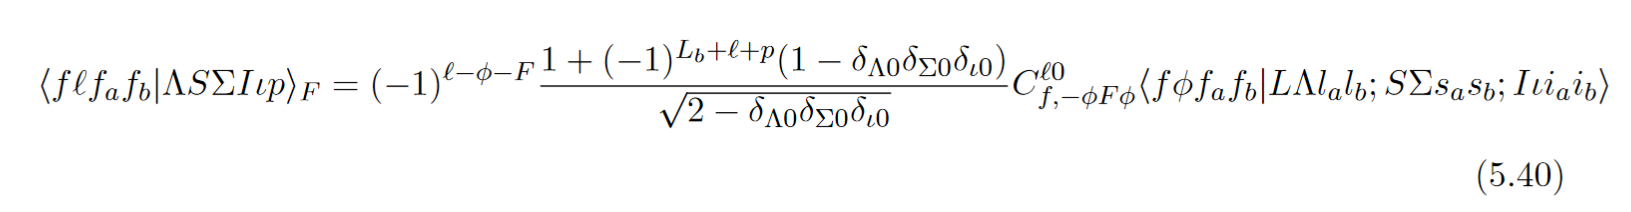

### testing subcoef

In [231]:
wigner_9j_table = {}
def wigner_9j_with_table(j1,j2,j3,j4,j5,j6,j7,j8,j9):
    # the sympy calculation is slow, so I implemented this little table lookup function which is ~100X faster.
    # it just saves the results and preferentially retrieves them from this dictionary rather than recalculate them.
    vals = [j1,j2,j3,j4,j5,j6,j7,j8,j9]
    indexStr = ''.join([str(x)+','for x in vals])
    if indexStr not in wigner_9j_table:
        wigner_9j_table[indexStr] = float(wigner_9j(*vals))
    return wigner_9j_table[indexStr]

In [232]:
CG_table = {}
def CG_with_table(j1, mj1, j2, mj2, j3, mj3):
    vals = [j1, mj1, j2, mj2, j3, mj3]
    indexStr = ''.join([str(x)+','for x in vals])
    if indexStr not in CG_table:
        CG_table[indexStr] = float(CG(*vals).doit())
    return CG_table[indexStr]

### testing etoa matrix

In [188]:
def createCaseE_BasisHfs(F_rel,verbose=False):
    # for j and ell, J goes from J=j-ell or zero to J=j+ell
    # given J and j, ell goes from ell=J+j to ell = J-j
    # cases in this case_E do not have a good total angular momentum J=ell+j. For example, |j_a j_b j ell > = |1/2 1/2 1 1> couples to states
    # of J = 2 (ell = J-1) and J = 0 (ell = j+1) to help read the table in the potassium paper. however, the way I am working with this I am segmenting my states by 
    # the case A basis which does have good J, so I only want the states that will couple to my case A basis.
    caseE_BasisRef = []
    j_a = 1/2
    i_a = i_b = 3/2
    for totalParity in ["+","-"]:
        for f_a in np.arange(abs(i_a - j_a), i_a + j_a+1,1):
            for j_b in [1/2,3/2]:
                for f_a in np.arange(abs(i_b - j_b), i_b + j_b+1,1):
                    for f in np.arange(abs(f_a-f_b),f_a+f_b+1,1, dtype=float):
                        for ell in np.arange(F_rel-f,F_rel+f+1,1, dtype=float):
                            state = mol.multiplyableDict({"f": f, 
                                                          "f_a":f_a, 'j_a':j_a,'i_a':i_a,
                                                          "f_b":f_b, 'j_b':j_b,'i_b':i_b,
                                                          "ell":ell, "totalParity":totalParity})
                            if state not in caseE_BasisRef:
                                caseE_BasisRef.append(state)
    return caseE_BasisRef

In [264]:
def create_EtoA_Matrix_Hfs(caseA_Basis, caseE_Basis, verbose=False):
    res = np.zeros((len(caseA_Basis), len(caseE_Basis)))
    count=0
    for extraQN in [-1]:
        for aind, stateA in enumerate(caseA_Basis):
            misc.loopProgress(count, len(caseA_Basis)*len(caseE_Basis))
            for eind, stateE in enumerate(caseE_Basis):
                if not checkValid(stateA, stateE):
                    continue
                res[aind, eind] = coef_hfs(stateA, stateE, stateA['F'])
                print(stateA, stateE, res[aind, eind])
                count += 1
        print('')
    return res

In [265]:
def calcCoef(stateA,stateE, pv, verbose=False):
    stateSignedSigma = stateA['|Omega|']-stateA['|Lambda|']
    return coef_fs( stateE['ja'], stateE['jb'], stateE['j'], stateE['ell'], stateA["L"], stateA["S"], 
                    1/2, 1/2, stateA["|Lambda|"], stateSignedSigma, stateA["|Omega|"], pv, stateA["J"],
                    verbose=verbose )

In [269]:
def checkValid(stateA, stateE):
    f_a = stateE['f_a']
    f_b = stateE['f_a']
    f_ = stateE['f']
    j_a = stateE['j_a']
    j_b = stateE['j_b']
    S_ = stateA['S']
    phi_ = stateA['phi']
    I_ = stateA['i']
    iota_ = stateA['|iota|']
    Lambda_ = stateA['|Lambda|']
    Omega_ = phi_-iota_
    Sigma_ = Omega_-Lambda_
    ell = stateE['ell']
    l_a = 0
    l_b = 1
    L_ = 1
    p=0
    if ell < 0:
        return False
    if phi_ != iota_+Omega_:
        #raise ValueError('Bad phi,iota,omega:',phi_,iota_,Omega_)
        return False
    if Omega_ != Sigma_+Lambda_:
        #raise ValueError('Bad Omega,Sigma,Lambda:',Omega_,Sigma_,Lambda_)
        return False
    if I_ not in np.arange(abs(i_a-i_b), i_a+i_b+1,1):
        #raise ValueError('Bad values: I,i_a,i_b='+str(I_)+','+str(i_a)+','+str(i_b))
        return False
    if f_ not in np.arange(abs(f_a-f_b), f_a+f_b+1,1):
        return False
        #raise ValueError('Bad values: f,f_a,f_b='+str(f_)+','+str(f_a)+','+str(f_b))
    if abs(Sigma_)>S_:
        #raise ValueError('Bad values: S,Sigma='+str(S_)+','+str(Sigma_))
        return False
    return True

In [270]:
def coef_hfs(stateA, stateE, F_):
    f_a = stateE['f_a']
    f_b = stateE['f_a']
    f_ = stateE['f']
    j_a = stateE['j_a']
    j_b = stateE['j_b']
    S_ = stateA['S']
    phi_ = stateA['phi']
    I_ = stateA['i']
    iota_ = stateA['|iota|']
    Lambda_ = stateA['|Lambda|']
    Omega_ = phi_-iota_
    Sigma_ = Omega_-Lambda_
    ell = stateE['ell']
    l_a = 0
    l_b = 1
    L_ = 1
    p=0

    phase = (-1)**(ell-phi-F_)
    tDelta = 1 if Lambda==0 and Sigma==0 and iota==0 else 0
    frac = (1+(-1)**(l_b+ell+p)*(1-tDelta))/np.sqrt(2-tDelta)
    cgCoef = CG_with_table(f_,-phi,F_,phi,ell,0)
    subC = subcoef_HFS_3( f_a,f_b,f_,phi,j_a,j_b,S_,Sigma_,I_,iota_,Lambda_,Omega_ )
    return phase*frac*cgCoef*subC

Should be 4 bases relevant for hfs rotation of the two different parities I think.

Testing single unsymmetrized symmetrized state decomposition

In [275]:
S_, Sigma = 1,1
i_a = i_b = 3/2
I_, iota = 3,1
Lambda = -1
Omega=Sigma+Lambda
phi=Omega+iota
sumv=0
ket = ','.join([str(v_) for v_ in [Lambda,S_,Sigma,I_,iota]])+r'\rangle$'

j_a = 1/2
for f_a in np.arange(abs(i_a - j_a), i_a + j_a+1,1):
    for j_b in [1/2,3/2]:
        for f_b in np.arange(abs(i_a-j_b),i_a+j_b+1,1):
            for f_ in np.arange(abs(f_a-f_b),f_a+f_b+1,1):
                if abs(phi) > f_:
                    continue
                if f_ > S_+1+I_:
                    continue
                if f_ < min([abs(I_-(S_+1)),abs(S_-(I_+1))]):
                    continue
                val = subcoef_HFS_3( f_a,f_b,f_,phi,j_a, j_b,
                                     S_, Sigma, I_, iota, Lambda, Omega,
                                     False, False )
                sumv += val**2
                #display(Latex(r'$\langle'+','.join([str(v_) for v_ in [f_,phi,f_a,f_b]])+'|'+ket+'->'+misc.round_sig_str(val**2)))
print('Total:',sumv)

Total: 0.9999999999999992


### testing single sym state decomp

In [279]:
caseE_basis[0]

{'f': 2.0,
 'f_a': 1.0,
 'j_a': 0.5,
 'i_a': 1.5,
 'f_b': 3.0,
 'j_b': 0.5,
 'i_b': 1.5,
 'ell': -2.0,
 'totalParity': '+'}

In [281]:
caseA_basis[0]

{'L': 1,
 '|Lambda|': 1,
 'sigma': 'g',
 'S': 1,
 '|Sigma|': 1,
 'i': 0.0,
 '|iota|': 0.0,
 'i1': 1.5,
 'i2': 1.5,
 '|Omega|': 0,
 'phi': 0.0,
 'sigma_vxz': -1,
 'sigma_v2xz': -1.0,
 'F': 0}

In [280]:
Fv=0
caseE_basis = createCaseE_BasisHfs(Fv)
caseA_basis = mol.createCaseABasis_Sym([1], [0,1], [3/2], sigmavals=['g', 'u'],Fv=Fv)

#### testing matrix generation

In [271]:
fvals=range(0,1)
#jvals = [3,10,100,1000]
superdata = {}
for totalParity in ['+','-']:
    for fValNum, Fv in enumerate(fvals):
        #caseAMostlySymHfs = mol.createCaseABasis_Sym([1],[0,1], [3/2], sigmavals=['g', 'u'], Fv=Fv)
        caseE_basis = createCaseE_BasisHfs(Fv)
        parity = ('e' if ((-1)**Fv)==1 else 'f')
        rotSymBase_E = {}
        for state in caseE_basis:
            if (-1)**state['ell'] != -1:
                continue
            #print(state['totalParity'],'!')
            label = state['totalParity'] + ('e' if ((-1)**(Fv))==1 else 'f')
            if label[-1] != parity:
                continue
            if label not in rotSymBase_E:
                rotSymBase_E[label] = []
            if state not in rotSymBase_E[label]:
                rotSymBase_E[label].append(state)
        caseA_basis = mol.createCaseABasis_Sym([1], [0,1], [3/2], sigmavals=['g', 'u'],Fv=Fv)
        rotSymBase_A = {}
        for state in caseA_basis:
            parity_ = '-' if state['sigma_v2xz'] == -1 else '+'
            label = parity_ + ('e' if ((-1)**(state['F']))==1 else 'f')
            if label[-1] != parity:
                continue
            if label not in rotSymBase_A:
                rotSymBase_A[label] = []
            if state not in rotSymBase_A[label]:
                rotSymBase_A[label].append(state)
            #rotSymBase_A[label].append(state)
        #label = sigmaParity+parity
        # this is the symmetry which will be analyzed in this round
        label = totalParity+parity
        #print(totalParity)
        print(Fv,'A',rotSymBase_A.keys(),len(rotSymBase_A[label]))
        print(Fv,'E',rotSymBase_E.keys(),len(rotSymBase_E[label]))
        #etoa = create_EtoA_Matrix_Hfs(rotSymBase_A[label], rotSymBase_E[label], verbose=False).T

0 A dict_keys(['-e', '+e']) 194
0 E dict_keys(['+e', '-e']) 84
0 A dict_keys(['-e', '+e']) 190
0 E dict_keys(['+e', '-e']) 84


In [251]:
min(etoa.flatten())

0.0

In [256]:
for x in rotSymBase_A[label]:
    print(x)

{'L': 1, '|Lambda|': 1, 'sigma': 'g', 'S': 1, '|Sigma|': 1, 'i': 0.0, '|iota|': 0.0, 'i1': 1.5, 'i2': 1.5, '|Omega|': 0, 'phi': 0.0, 'sigma_vxz': -1, 'sigma_v2xz': -1.0, 'F': 0}
{'L': 1, '|Lambda|': 1, 'sigma': 'g', 'S': 1, '|Sigma|': 1, 'i': 1.0, '|iota|': 1.0, 'i1': 1.5, 'i2': 1.5, '|Omega|': 0, 'phi': -1.0, 'sigma_vxz': -1, 'sigma_v2xz': -1.0, 'F': 0}
{'L': 1, '|Lambda|': 1, 'sigma': 'g', 'S': 1, '|Sigma|': 1, 'i': 1.0, '|iota|': 0.0, 'i1': 1.5, 'i2': 1.5, '|Omega|': 0, 'phi': 0.0, 'sigma_vxz': 1, 'sigma_v2xz': -1.0, 'F': 0}
{'L': 1, '|Lambda|': 1, 'sigma': 'g', 'S': 1, '|Sigma|': 1, 'i': 1.0, '|iota|': 1.0, 'i1': 1.5, 'i2': 1.5, '|Omega|': 0, 'phi': 1.0, 'sigma_vxz': -1, 'sigma_v2xz': -1.0, 'F': 0}
{'L': 1, '|Lambda|': 1, 'sigma': 'g', 'S': 1, '|Sigma|': 1, 'i': 2.0, '|iota|': 2.0, 'i1': 1.5, 'i2': 1.5, '|Omega|': 0, 'phi': -2.0, 'sigma_vxz': -1, 'sigma_v2xz': -1.0, 'F': 0}
{'L': 1, '|Lambda|': 1, 'sigma': 'g', 'S': 1, '|Sigma|': 1, 'i': 2.0, '|iota|': 1.0, 'i1': 1.5, 'i2': 1.5, '|

In [204]:
rotSymBase_A['-e'][0]

{'L': 1,
 '|Lambda|': 1,
 'sigma': 'g',
 'S': 1,
 '|Sigma|': 1,
 'i': 0.0,
 '|iota|': 0.0,
 'i1': 1.5,
 'i2': 1.5,
 '|Omega|': 0,
 'phi': 0.0,
 'sigma_vxz': -1,
 'sigma_v2xz': -1.0,
 'F': 0}